In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Flatten
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data() # Data loading
x_train, x_test = x_train/255.0 , x_test/255.0 #Normalizing the data

11490434/11490434 [==============================] - 2s 0us/step


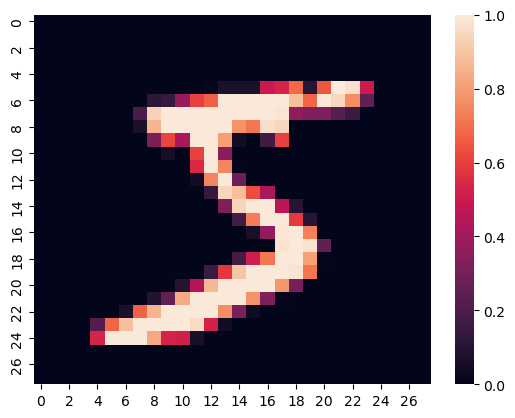

In [3]:
sns.heatmap(x_train[0])
plt.show()

In [5]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.19352795,  0.30977955,  0.39957407,  0.4756765 ,  0.06111994,
         0.7245303 ,  0.36443812,  0.19748963,  0.08226678,  0.08289513]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.06221818, 0.10292029, 0.1125896 , 0.1214924 , 0.0802619 ,
        0.15582062, 0.10870235, 0.09198861, 0.08197726, 0.08202879]],
      dtype=float32)

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [9]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3058 - accuracy: 0.9122
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1431 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0886 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9759


In [11]:
model.evaluate(x_test, y_test, verbose=2)


313/313 - 1s - loss: 0.0799 - accuracy: 0.9747 - 673ms/epoch - 2ms/step


[0.07993678003549576, 0.9746999740600586]

In [13]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0517 - accuracy: 0.9842 - val_loss: 0.0651 - val_accuracy: 0.9798
Epoch 2/5
300/300 [==============================] - 2s 5ms/step - loss: 0.0472 - accuracy: 0.9855 - val_loss: 0.0636 - val_accuracy: 0.9803
Epoch 3/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0634 - val_accuracy: 0.9818
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0432 - accuracy: 0.9867 - val_loss: 0.0615 - val_accuracy: 0.9814
Epoch 5/5
300/300 [==============================] - 2s 6ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0628 - val_accuracy: 0.9808


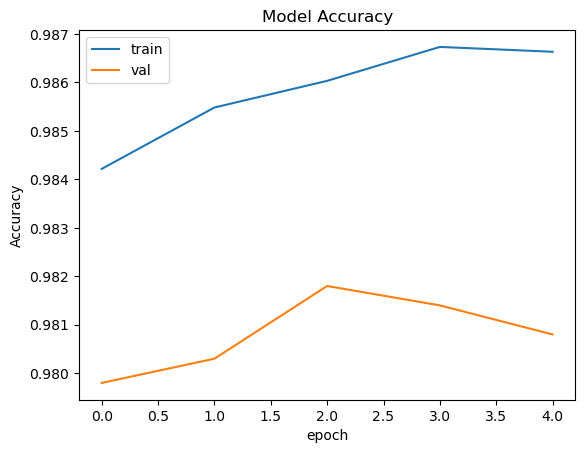

In [14]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()